In [ ]:
!pip install numpy pandas matplotlib seaborn statsmodels scipy copulalib pandas_montecarlo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_montecarlo
import copy
import statsmodels.api as sm # statistical model library
import scipy
from copulalib.copulalib import Copula 

%matplotlib inline

In [3]:
files = {"amd-usd": r"https://bit-rapid.com/ds_homework/data/amd.csv",
        "AT&S-usd": r"https://bit-rapid.com/ds_homework/data/AT&S_bereinigt.csv",
        "btc-eur": r"https://bit-rapid.com/ds_homework/data/btc-eur-max.csv",
        "btc-usd": r"https://bit-rapid.com/ds_homework/data/btc-usd-max.csv",
        "crude-oil-prices-europe-usd": r"https://bit-rapid.com/ds_homework/data/crude_oil_prices_brent_europe.csv",
        "dax-eur": r"https://bit-rapid.com/ds_homework/data/DAX.csv",
        #"eur-usd": r"https://bit-rapid.com/ds_homework/data/eur-usd.csv",
        "gold-usd": r"https://bit-rapid.com/ds_homework/data/gold.csv",
        "intel-usd": r"https://bit-rapid.com/ds_homework/data/Intel_bereinigt.csv",
         "ltc-eur": r"https://bit-rapid.com/ds_homework/data/ltc_eur_max.csv",
         "ltc-usd": r"https://bit-rapid.com/ds_homework/data/ltc_usd_max.csv",
        "nikkei": r"https://bit-rapid.com/ds_homework/data/Nikkei 225.csv",
         "sp500": r"https://bit-rapid.com/ds_homework/data/sp500.csv",
        "ripple-usd": r"https://bit-rapid.com/ds_homework/data/xrp_usd.csv",
         "nvidia": r"https://bit-rapid.com/ds_homework/data/nvidia.csv",
        "ripple-eur": r"https://bit-rapid.com/ds_homework/data/xrp_eur.csv"}

data = {}

In [4]:
dates = pd.date_range('01-01-2014', '10-31-2017')

for key, value in files.items():
    data[key] = pd.read_csv(files[key], sep=";", decimal=",")
    data[key]['date'] =  pd.to_datetime(data[key]['date'], format='%Y-%m-%d')
    data[key] = data[key].sort_values(by=['date'], ascending=[True])
    data[key].set_index('date', inplace=True)
    data[key] = data[key].resample('D').ffill().reset_index()

In [5]:
def plot_datePrice(string):
    price = data[string]['price']
    date = data[string]['date']
    plt.plot(date, price)

In [6]:
def findCorrelation(string, string1):
    return scipy.stats.spearmanr(data[string]['price'], data[string1]['price'])[0][1]

In [7]:
prices = pd.DataFrame()

for key, value in data.items():
    prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

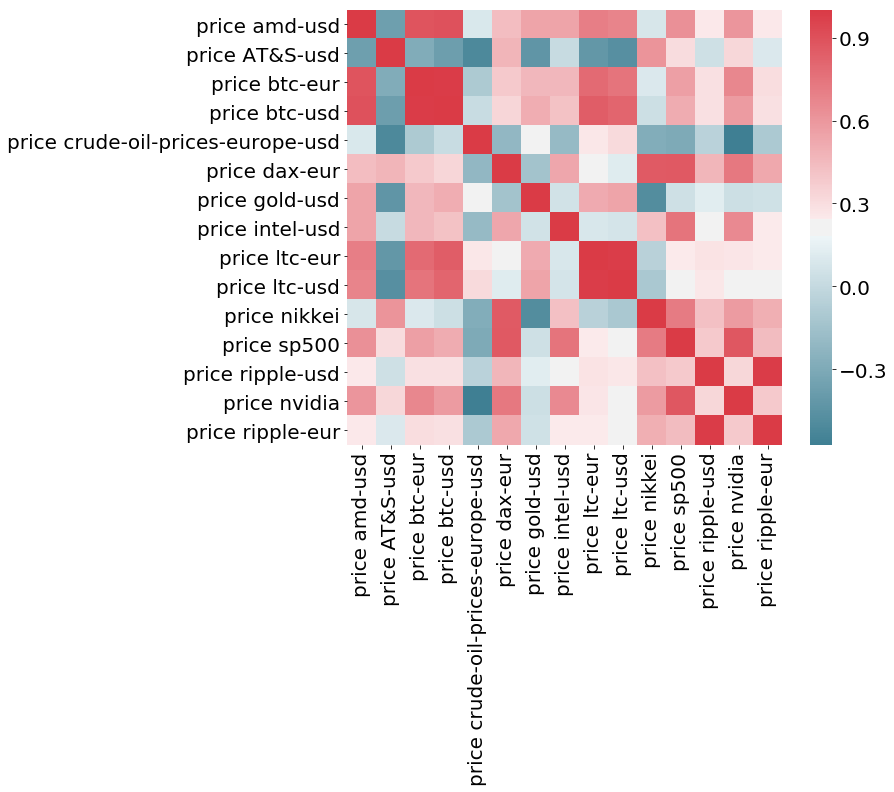

In [8]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Heat Map Description

This Heat Map shows the correlation between the historical prices of the Cryptocurrencies Bitcoin (BTC), Litecoin (LTC), Ripple (XRP) and the chosen stock data in the time from 01/01/2014 - 31/10/2017.

This first Heat Map illustrates all the stock exchange data that we initially expected to have a high correlation to at least one of the Cryptocurrencies. After preparing the data and visualizing the correlations in this Heat Map, we have noticed that some of the chosen data does not have a high correlation or even a negative correlation to the Cryptocurrencies.
For this reason we have taken the following data out of the scope:
* Gold price
* Oil price
* AT&S Stock Exchange

In [9]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
prices = pd.DataFrame()

for key, value in data.items():
    if key not in ['gold-usd', 'crude-oil-prices-europe-usd', 'AT&S-usd']:
        prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

This improved Heat Map now shows only positive correlated data. For further improvement, we have in a next step also removed the stock exchange data of Nikkei and Intel.

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
prices = pd.DataFrame()

for key, value in data.items():
    if key not in ['gold-usd', 'AT&S-usd', 'nikkei', 'intel-usd', 'ripple-eur', 'btc-eur', 'ltc-eur']:
        prices = pd.concat([prices, data[key]['price'].rename('price ' + key)], axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = prices.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Reds", square=True, ax=ax)

By this further optimization we have been able to illustrate a Heat Map which shows only data with a correlation greater than 0,5. 
A high correlation (between 0,5 and 0,8) can be observed for example between:
* BTC and AMD
* BTC and DAX
* BTC and SP500


* LTC and AMD
* LTC and DAX
* LTC and SP500
* LTC and NVIDIA


* XRP and AMD
* XRP and DAX
* XRP and SP500

While a very high correlation (between 0,8 and 1,0) can be seen between:
* BTC and LTC
* BTC and XRP
* BTC and NVIDIA


* LTC and BTC
* LTC and XRP


* XRP and BTC
* XRP and LTC
* XRP and NVIDIA

This comparison shows, that all three Cryptocurrencies show a quite high correlation to AMD, DAX, SP500 and NVIDIA. Nevertheless it cannot be stated if the currencies are directly correlated to the stock exchange rates or if the correlation depends on other variables.

### Price/percentage changes Plots

Jarque–Bera test (30712.908438013586, 0.0)


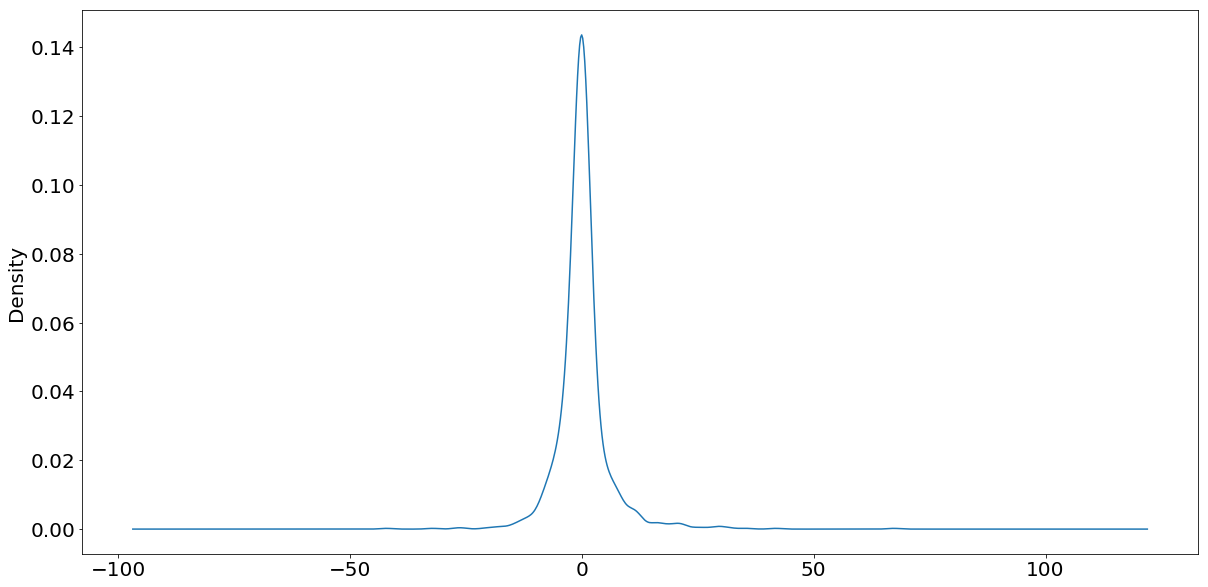

In [11]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
(prices['price ltc-usd'].pct_change()*100).plot(kind="kde")
print("Jarque–Bera test", scipy.stats.jarque_bera(prices['price ltc-usd'].pct_change()[1:]))

Jarque–Bera test (2491.1373290184974, 0.0)


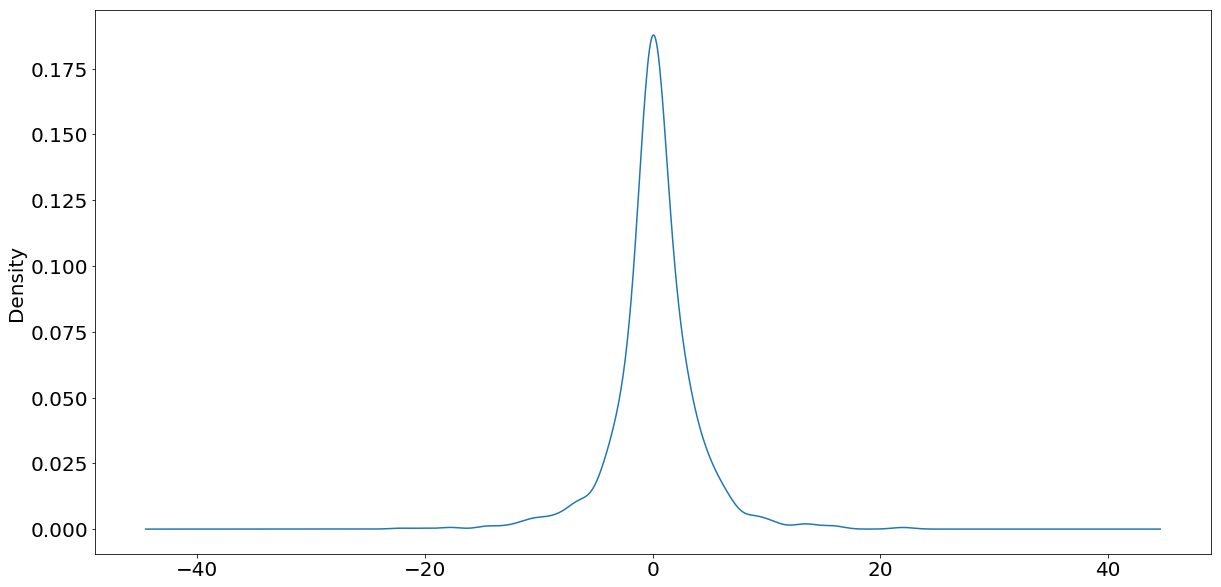

In [12]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
(prices['price btc-usd'].pct_change()*100).plot(kind="kde")
print("Jarque–Bera test", scipy.stats.jarque_bera(prices['price btc-usd'].pct_change()[1:]))

Jarque–Bera test (2491.1373290184974, 0.0)


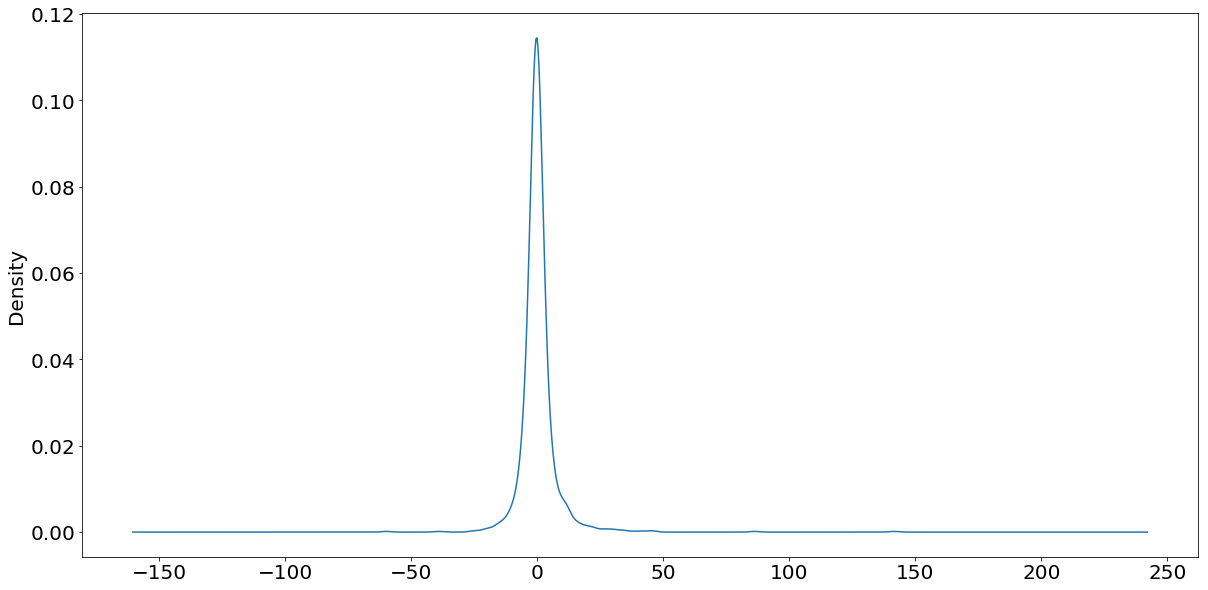

In [13]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
(prices['price ripple-usd'].pct_change()*100).plot(kind="kde")
print("Jarque–Bera test", scipy.stats.jarque_bera(prices['price btc-usd'].pct_change()[1:]))

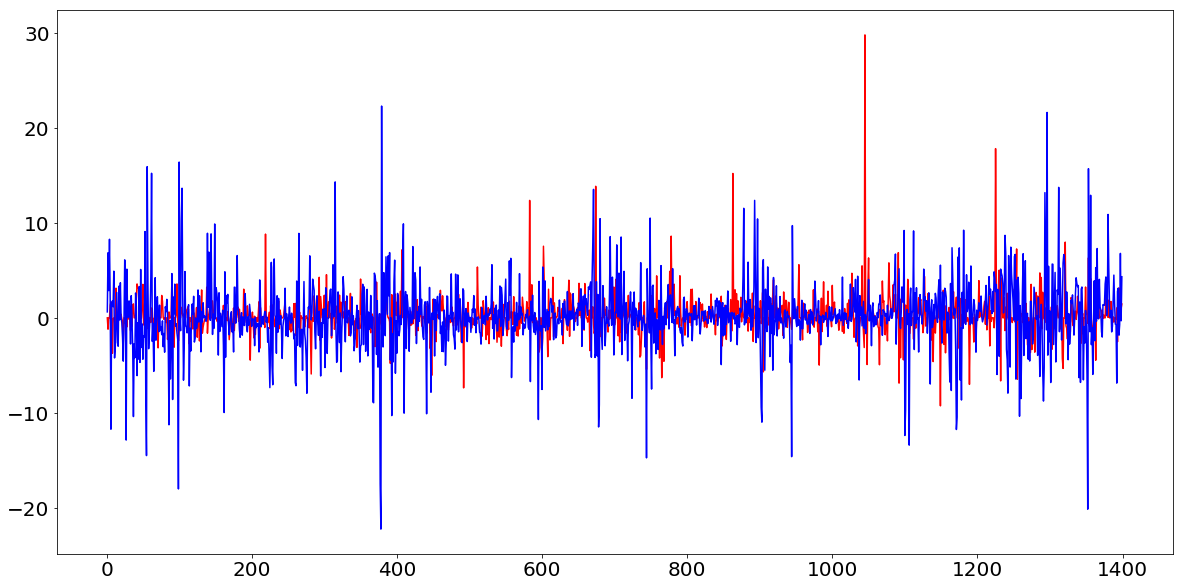

In [14]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
plt.plot(prices['price nvidia'].pct_change()*100, c="red")
plt.plot(prices['price btc-usd'].pct_change()*100, c="blue")
plt.show()

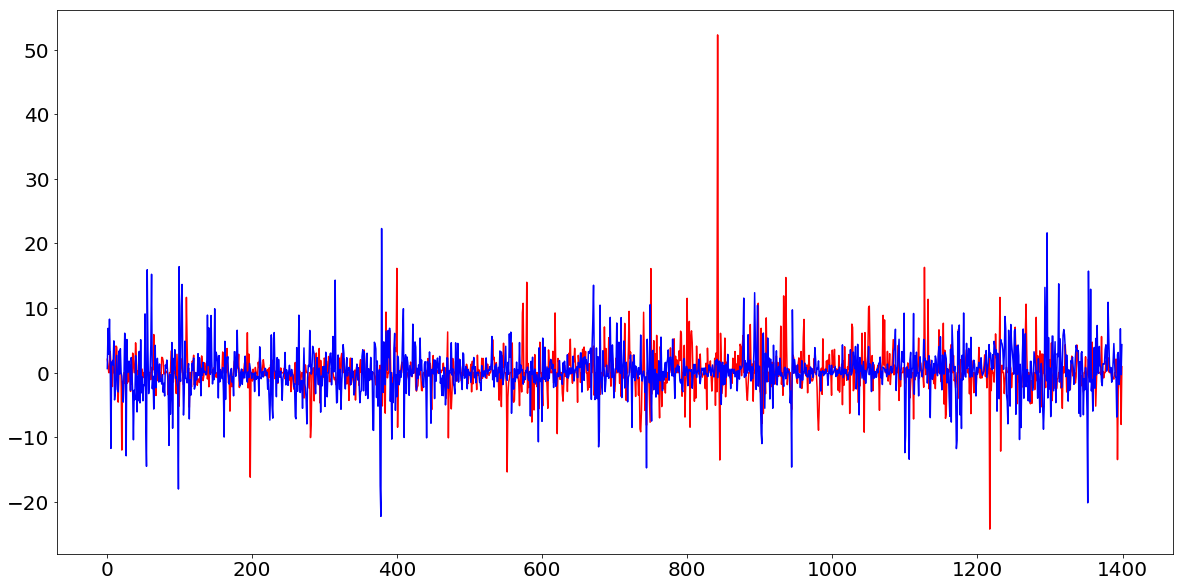

In [15]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
plt.plot(prices['price amd-usd'].pct_change()*100, c="red")
plt.plot(prices['price btc-usd'].pct_change()*100, c="blue")
plt.show()

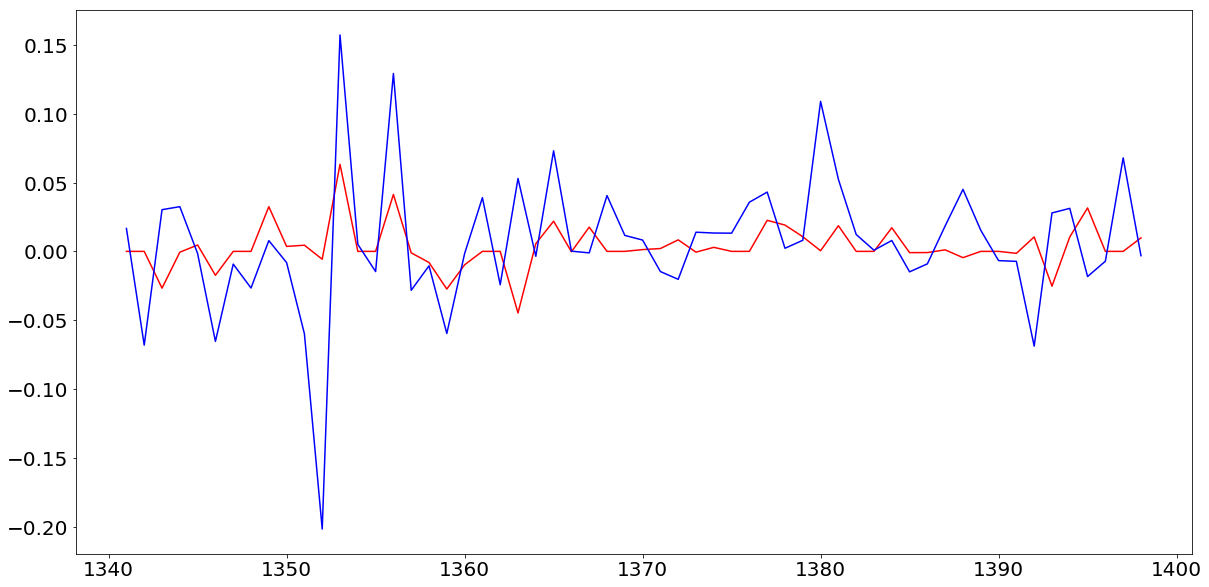

In [16]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
plt.plot(prices['price nvidia'][-60:-1].pct_change(), c="red")
plt.plot(prices['price btc-usd'][-60:-1].pct_change(), c="blue")
plt.show()

In [17]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
print(prices['price nvidia'].pct_change().describe())
print(prices['price btc-usd'].pct_change().describe())

count    1399.000000
mean        0.002026
std         0.019844
min        -0.092723
25%        -0.003174
50%         0.000000
75%         0.007151
max         0.298067
Name: price nvidia, dtype: float64
count    1399.000000
mean        0.002192
std         0.036727
min        -0.222584
25%        -0.010490
50%         0.001782
75%         0.016264
max         0.223110
Name: price btc-usd, dtype: float64


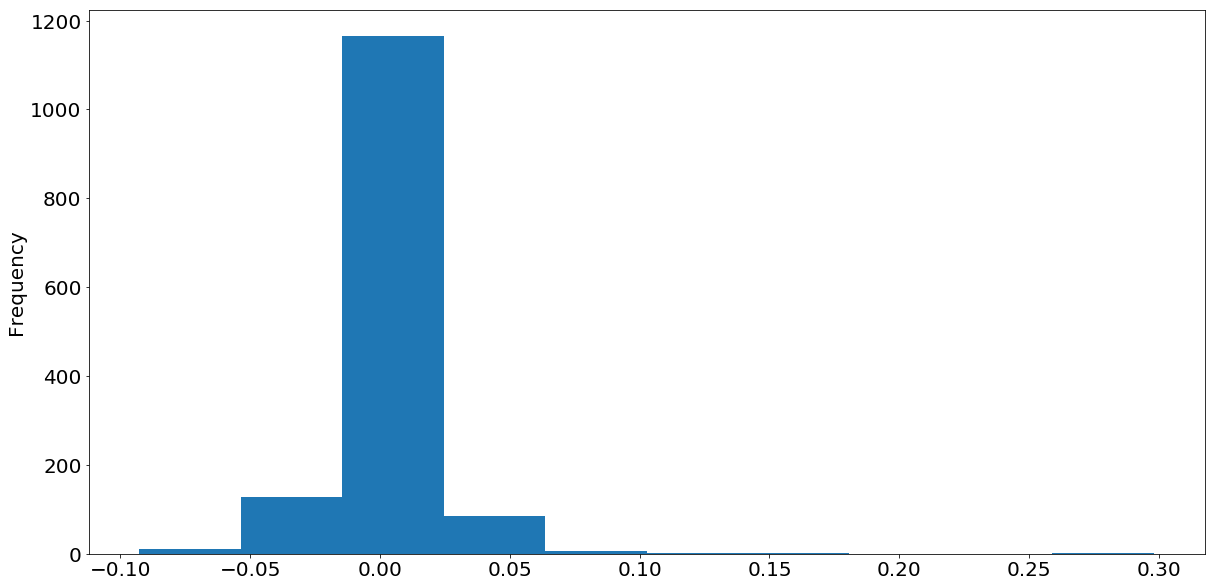

In [18]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
data['nvidia']['price'].pct_change().plot(kind="hist")

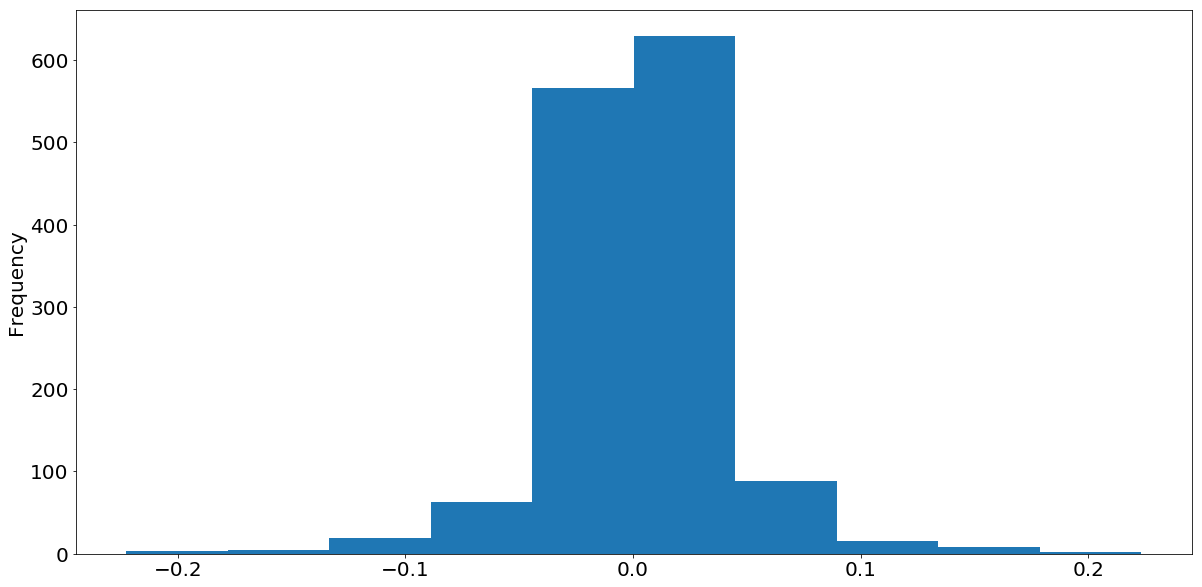

In [19]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
data['btc-usd']['price'].pct_change().plot(kind="hist")

## Monte Carlo Simulations

By using Monte Carlo Simulations, we have simulated 1000 possible results to show how the exchange rates/stock prices could continue during the next 30 days.
After comparing the results of the Monte Carlo Simulations on the normal distributed data and the mean with the real price data, we have noticed that the results of the Monte Carlo Simulations are generally 'too optimistic'.

----------------- btc-usd -----------------
CAGR = 73.6%
Annual Volatility = 70.17%


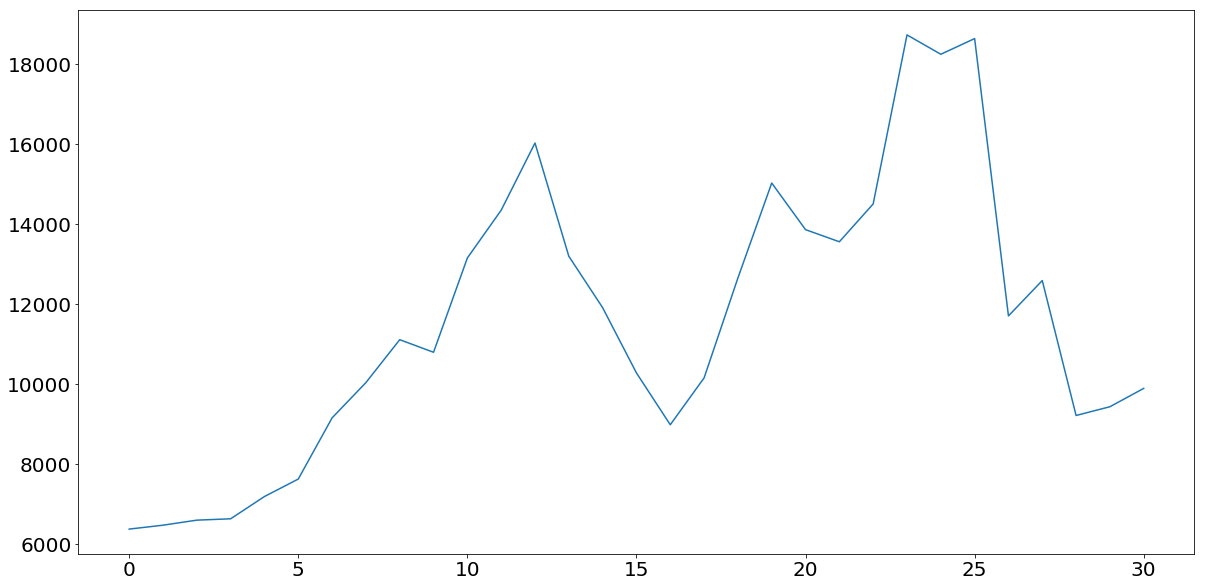

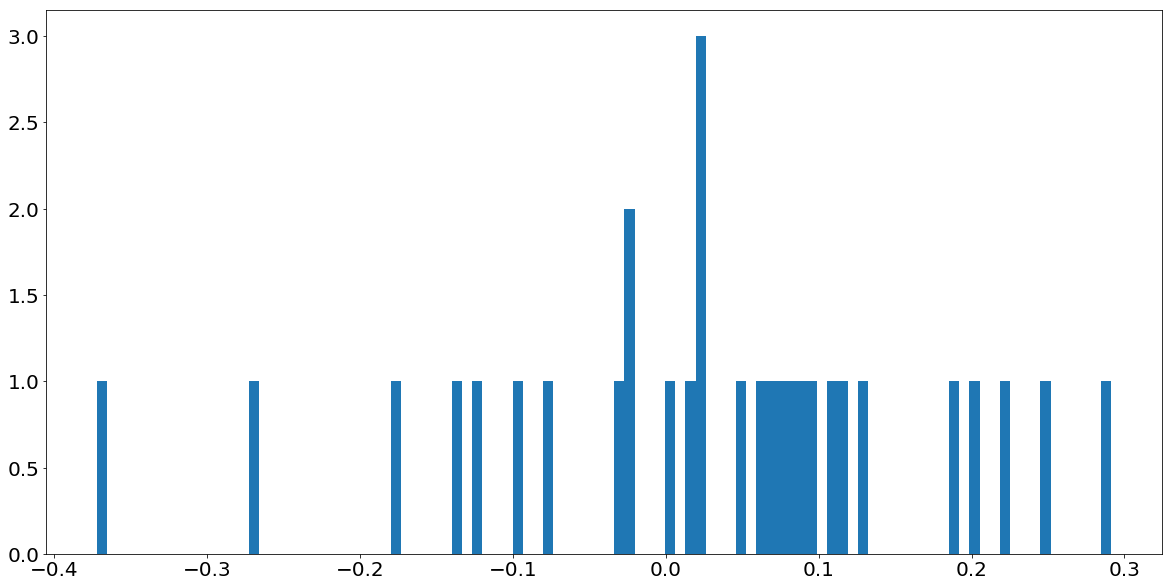

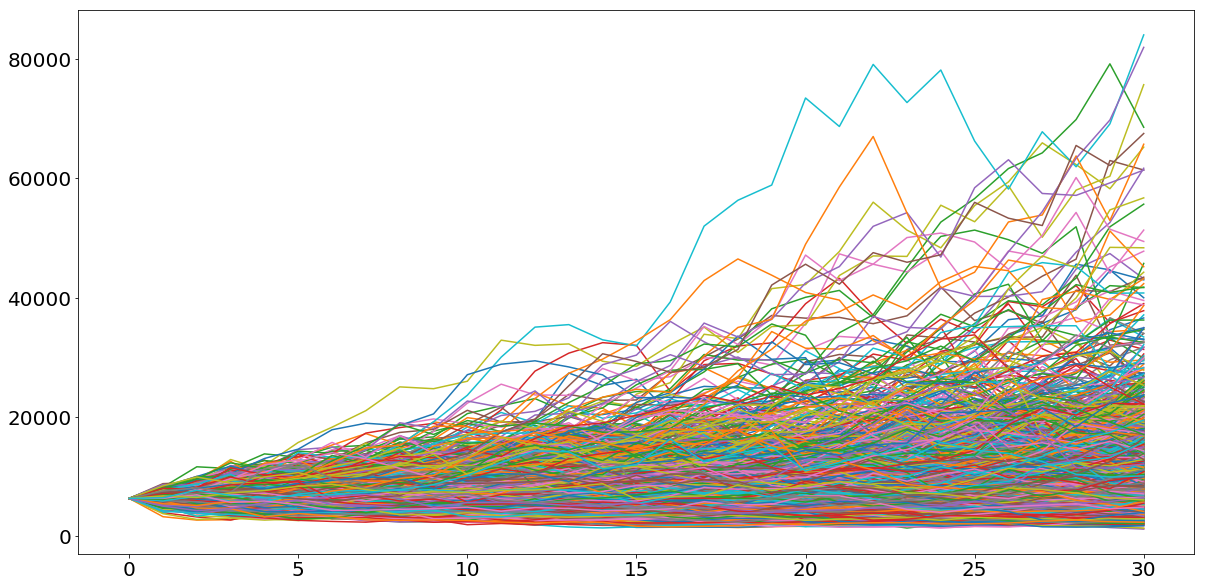

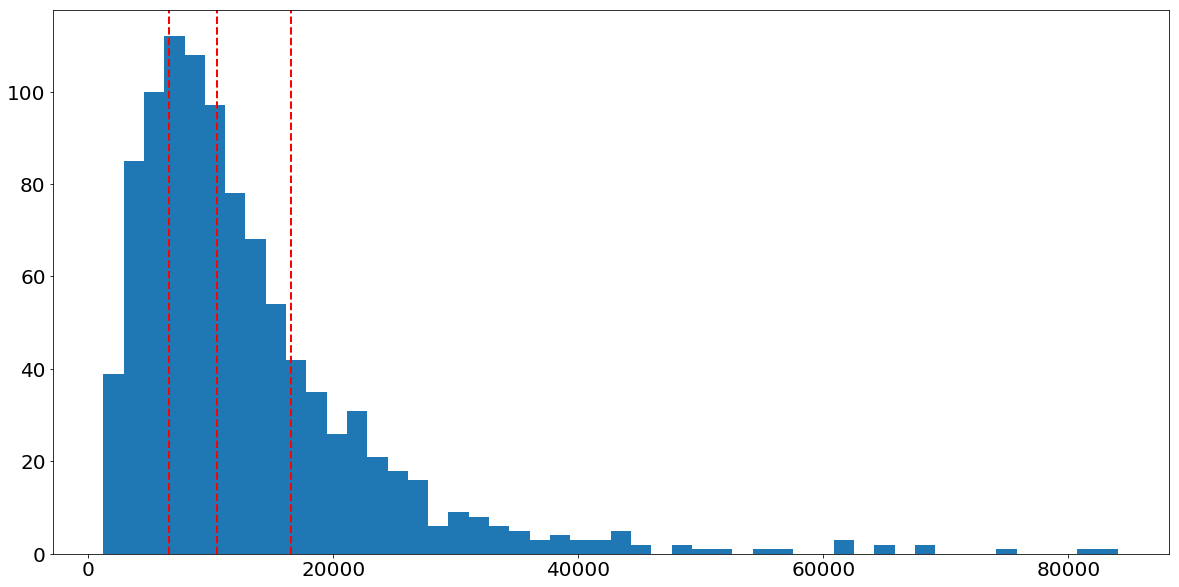

Mean = 14350.0351179
----------------- ltc-usd -----------------
CAGR = 23.32%
Annual Volatility = 110.4%


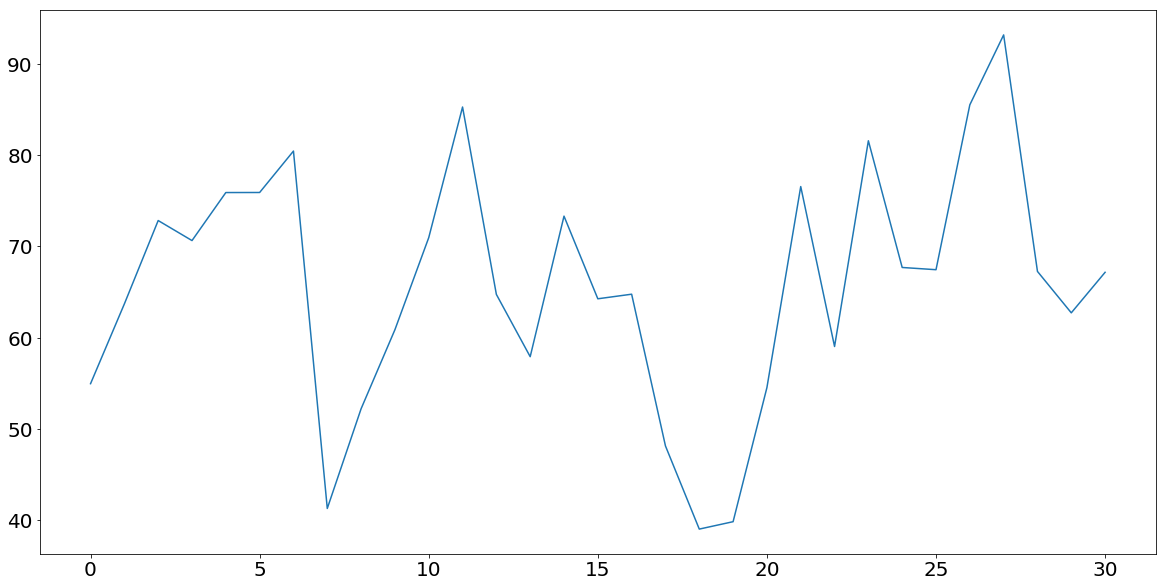

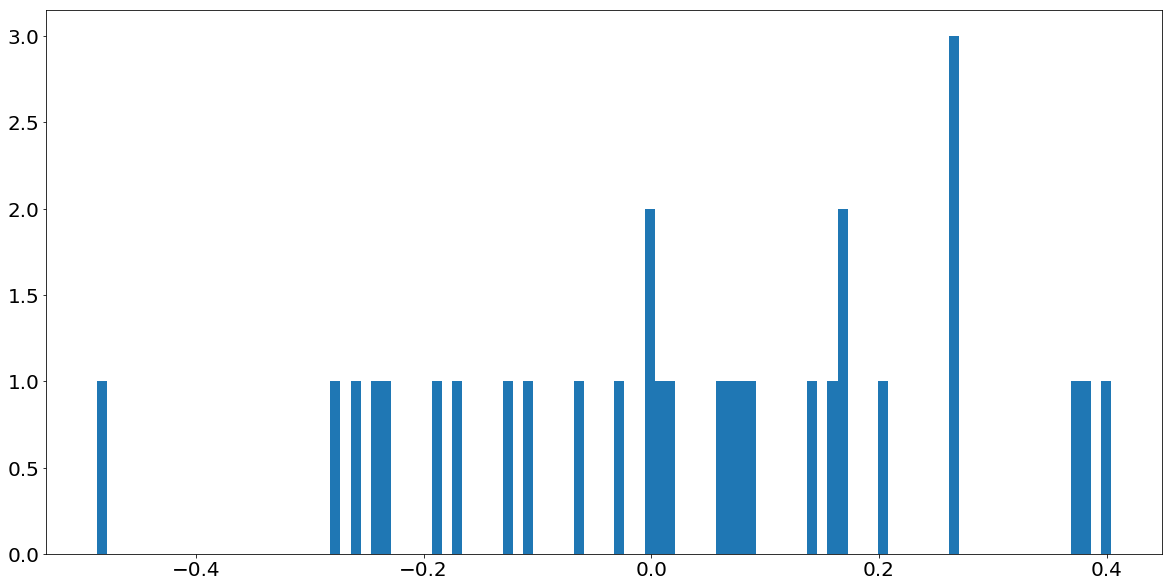

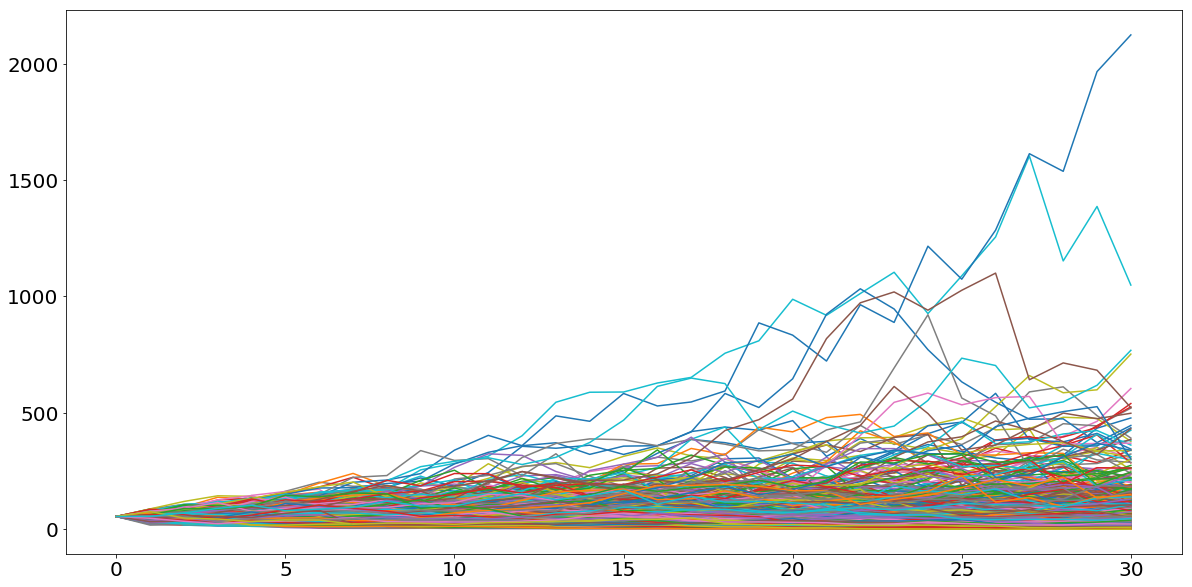

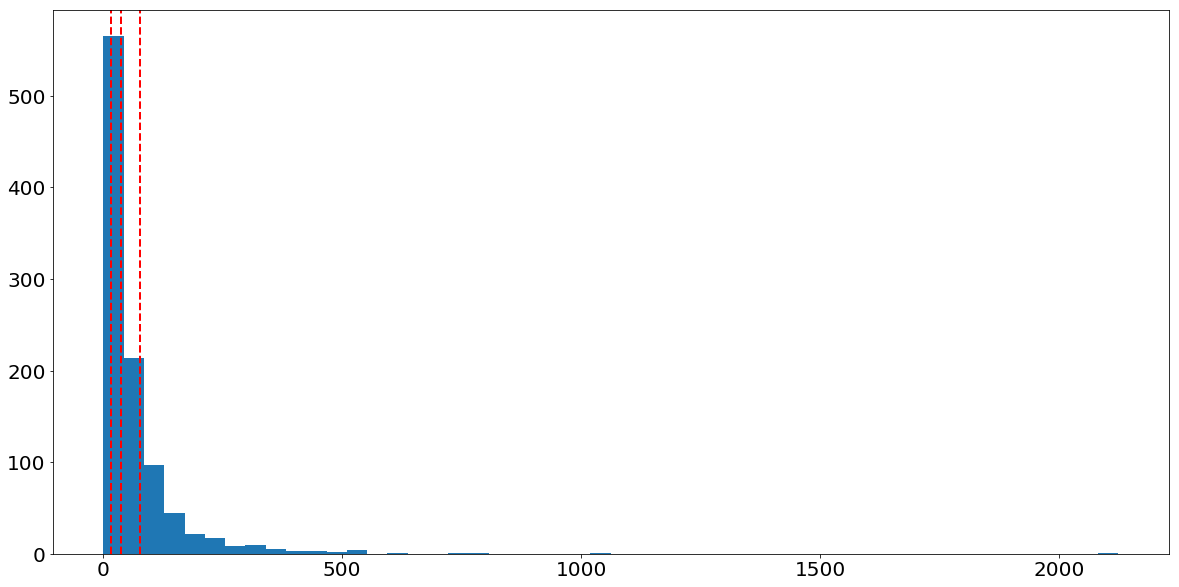

Mean = 44.9515403161
----------------- ripple-usd -----------------
CAGR = 68.66%
Annual Volatility = 147.86%


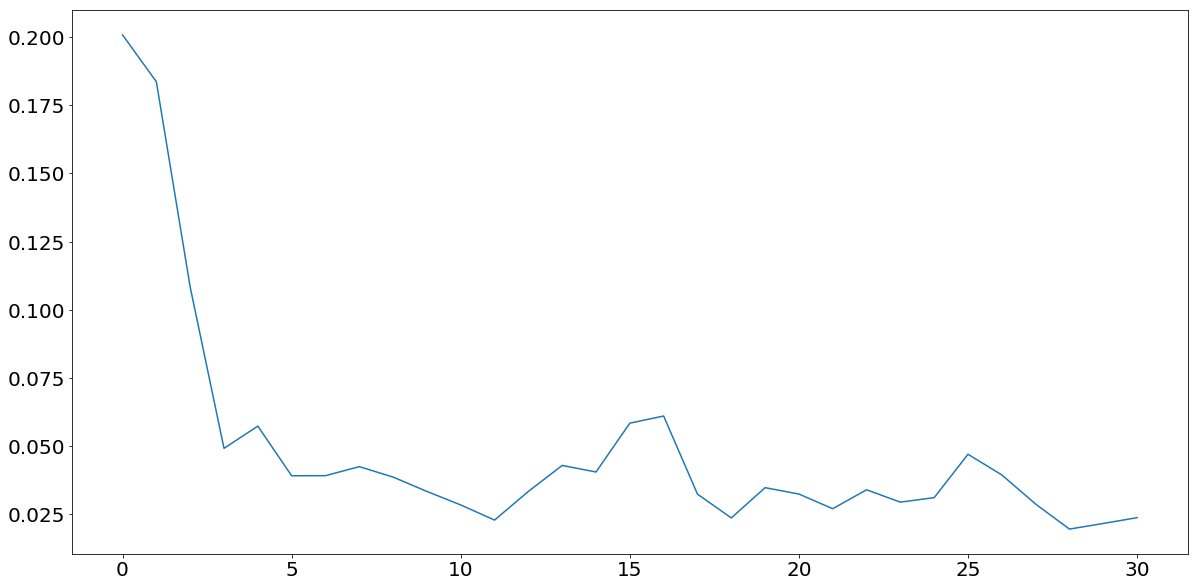

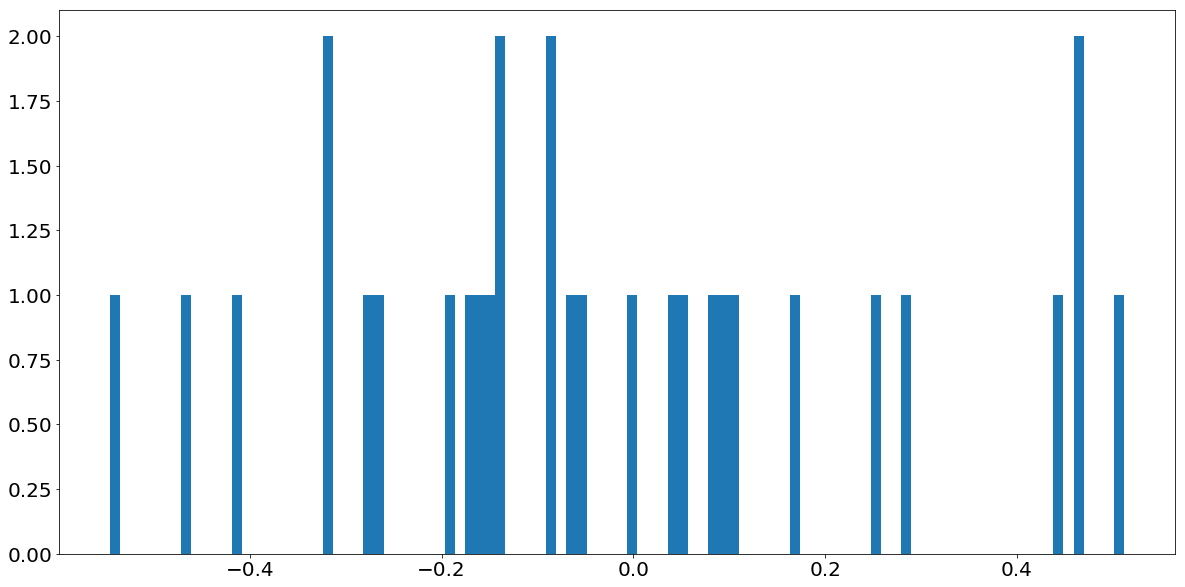

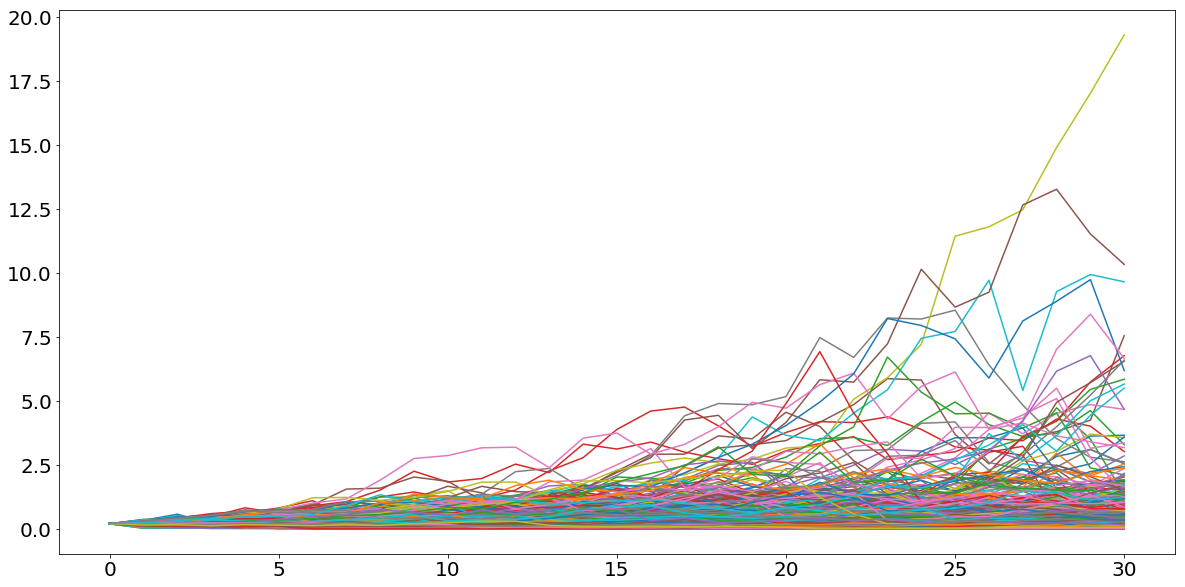

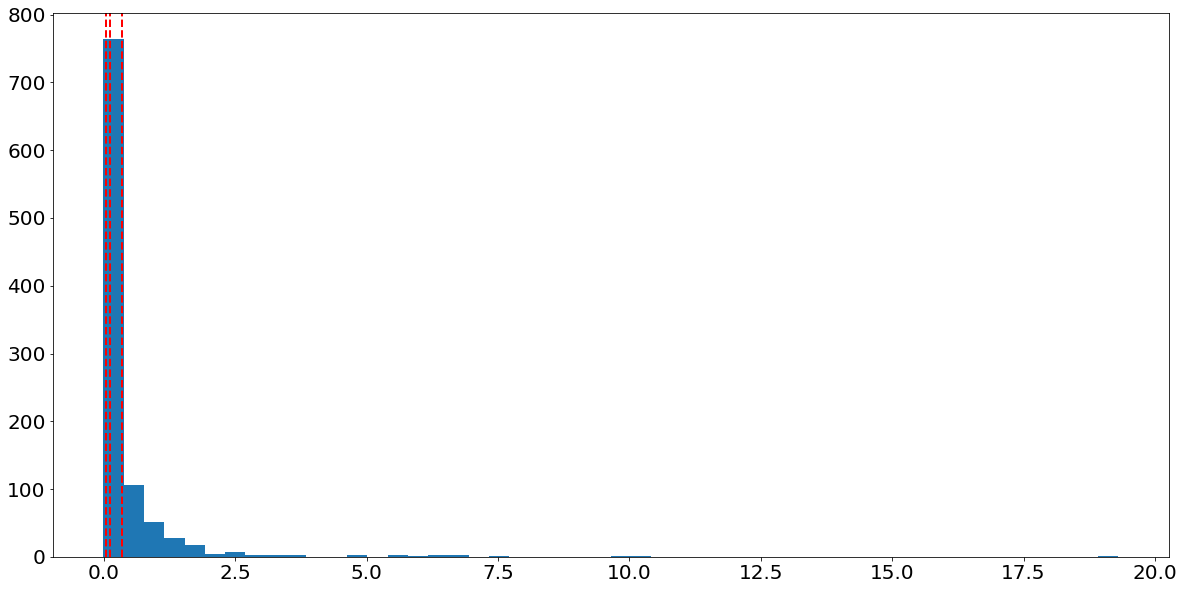

Mean = 0.232488713639
----------------- nvidia -----------------
CAGR = 95.33%
Annual Volatility = 37.91%


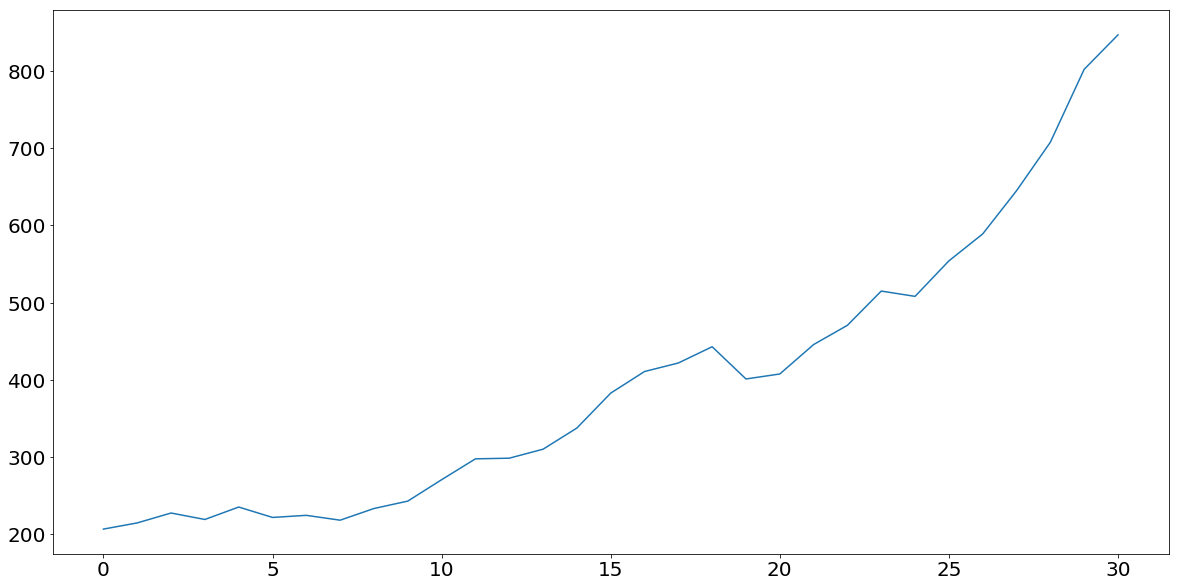

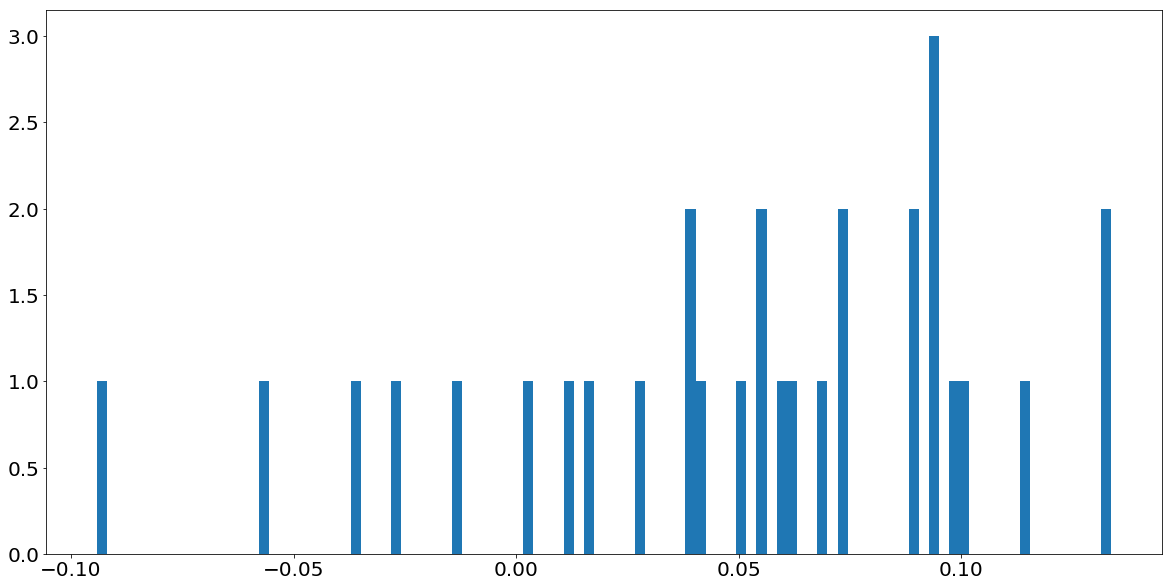

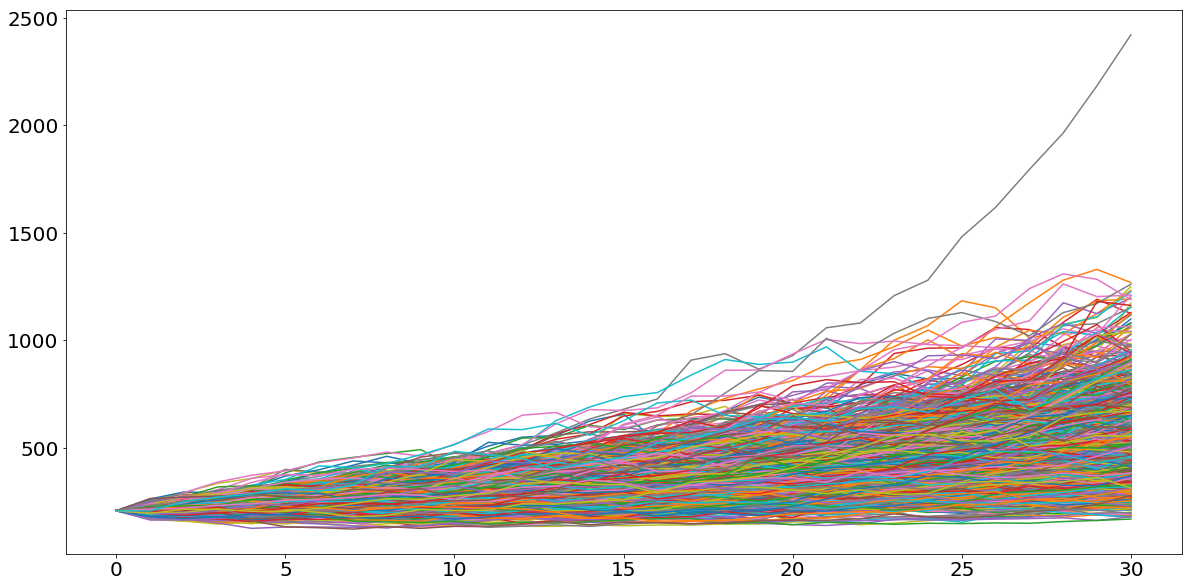

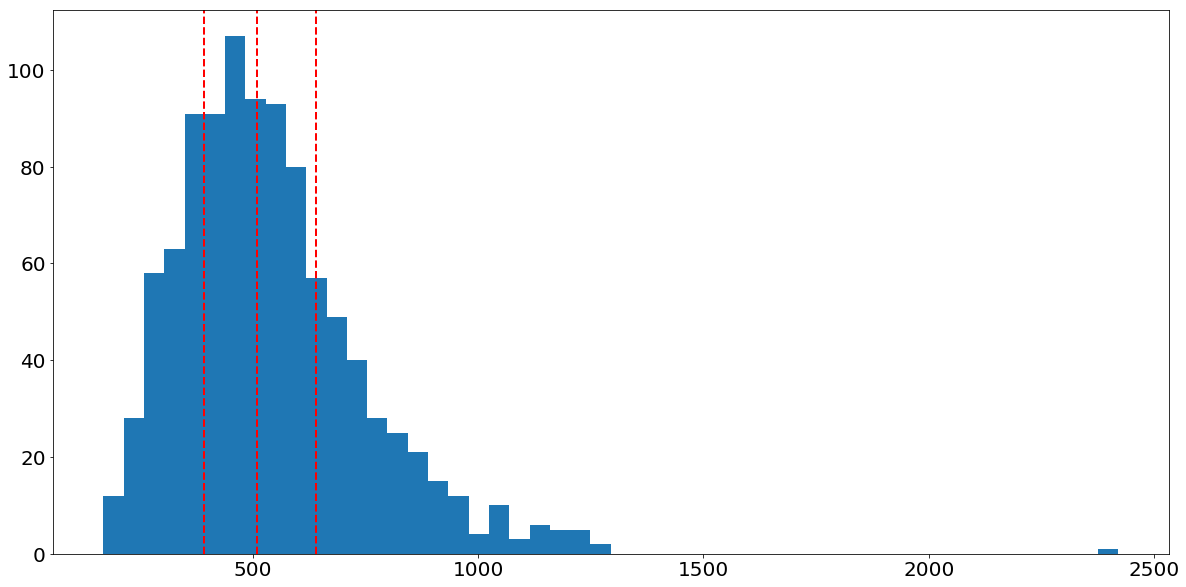

Mean = 627.388061977
----------------- sp500 -----------------
CAGR = 9.28%
Annual Volatility = 12.28%


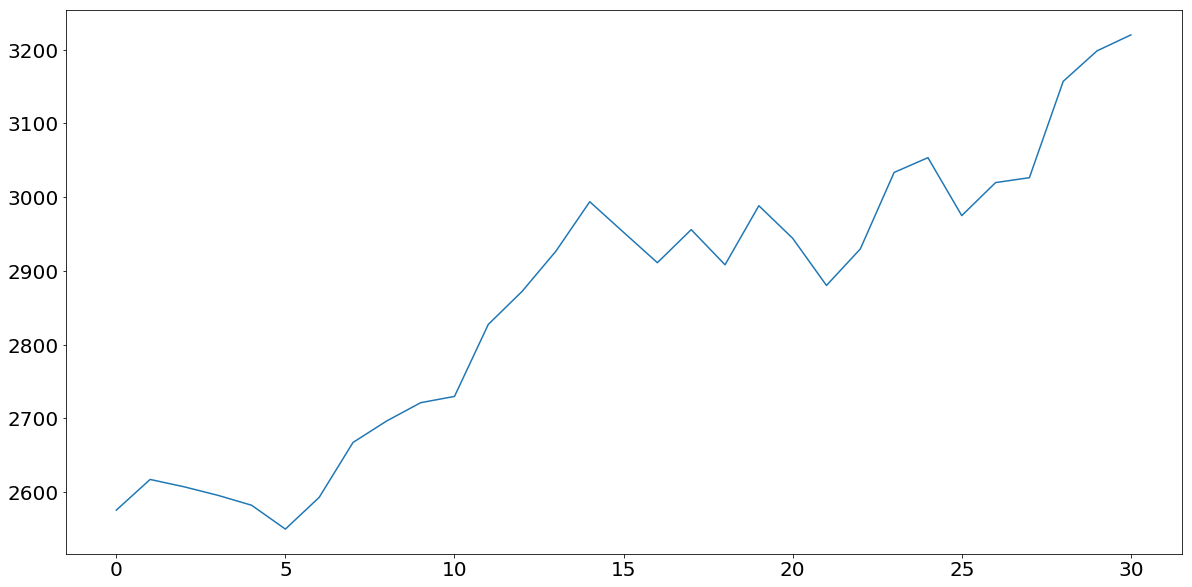

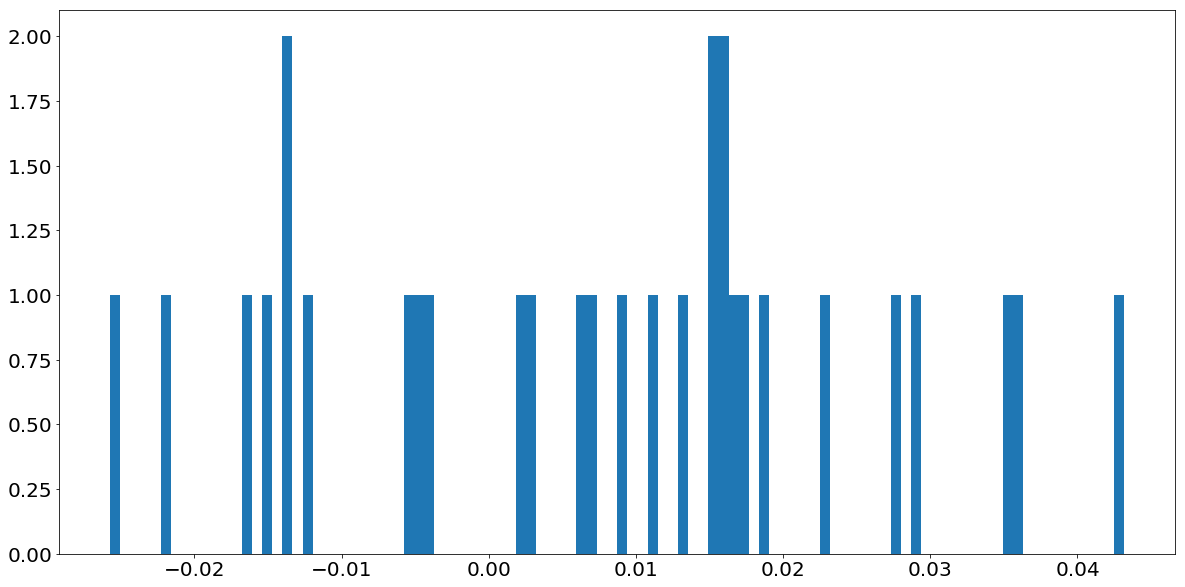

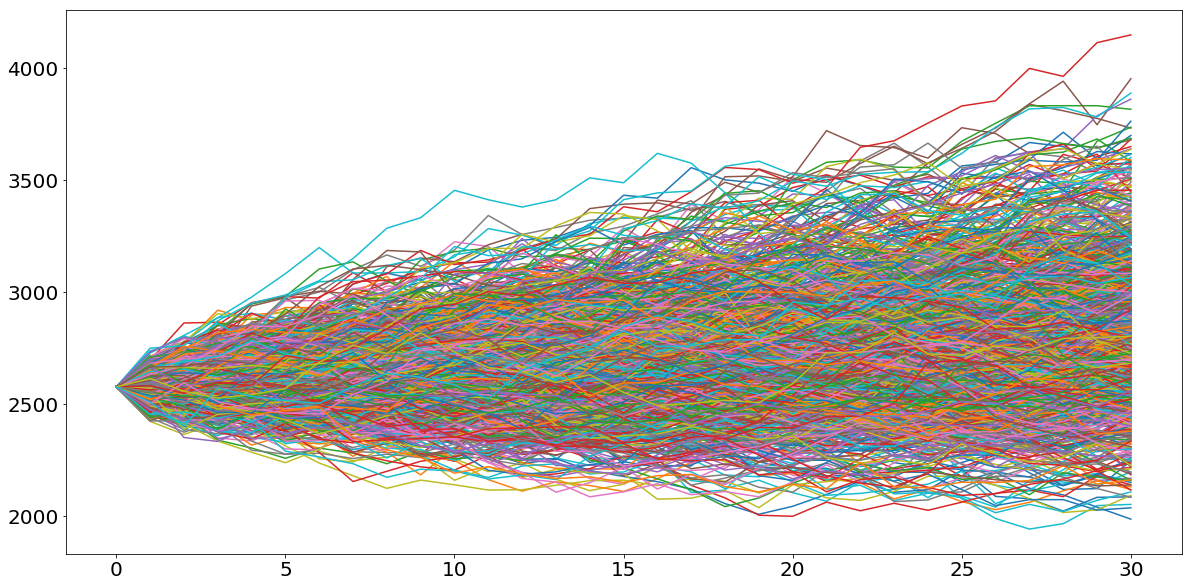

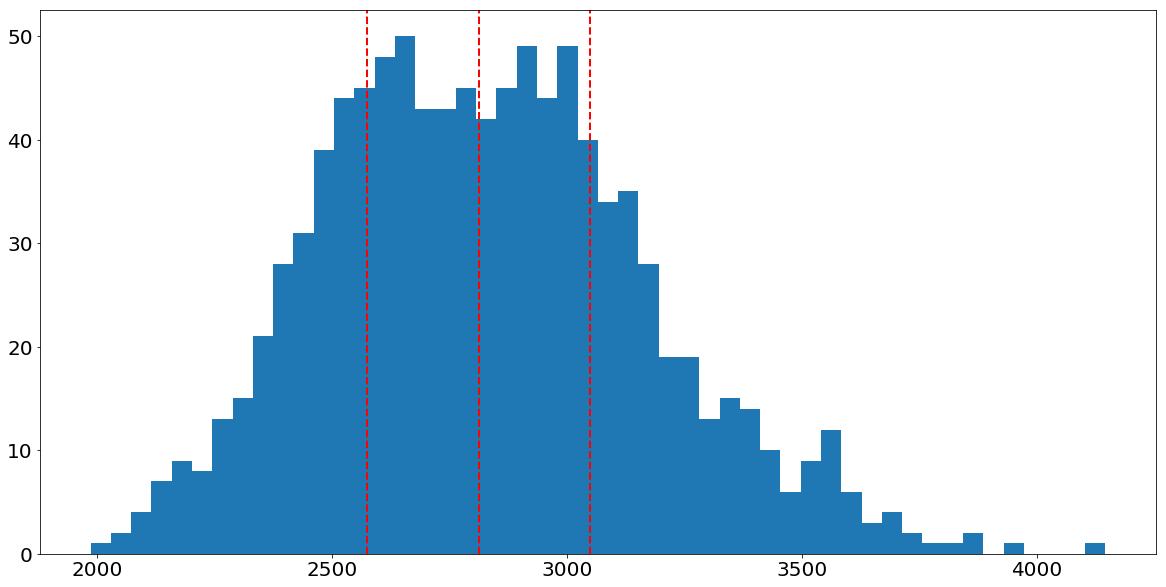

Mean = 2873.08044751


In [20]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo(t, name):
    days = len(data[name])
    cagr = (((data[name]['price'].iloc[-1] / data[name]['price'].iloc[0])) ** (365.0/days)) - 1
    mu = cagr
    returns = prices['price ' + name].pct_change()
    vol = prices['price ' + name].pct_change().std()*math.sqrt(365)
    T = t
    daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
    S = data[name]['price'].iloc[-1]
    #set starting price and create price series generated by above random daily returns
    price_list = [S]

    for x in daily_returns[0:T]:
        price_list.append(price_list[-1]*x)
            
    print('-----------------', name , '-----------------')
    print ('CAGR =',str(round(cagr,4)*100)+"%")
    print ("Annual Volatility =",str(round(vol,4)*100)+"%")
    
    #Generate Plots - price series and histogram of daily returns
    plt.plot(price_list)
    plt.show()
    plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
    plt.show()
    result = []
    for i in range(1000):
        daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
        
        price_list = [S]
 
        for x in daily_returns[0:T]:
            price_list.append(price_list[-1]*x)

        plt.plot(price_list)
        result.append(price_list[-1])
    plt.show()
    plt.axvline(np.percentile(result,25), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(result,50), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(np.percentile(result,75), color='r', linestyle='dashed', linewidth=2)
    plt.hist(result,bins=50)
    plt.show()
    print("Mean =", np.mean(result[0:30])) 
    
    
    
for key, value in data.items():
    if key in ['btc-usd', 'ltc-usd', 'ripple-usd']:
        pass

monte_carlo(30, 'btc-usd')
monte_carlo(30, 'ltc-usd')
monte_carlo(30, 'ripple-usd')
monte_carlo(30, 'nvidia')
monte_carlo(30, 'sp500')

In [21]:
np.std(prices['price amd-usd'].pct_change())

0.032865655256851679

In [22]:
def monte_carlo_multivariate(price1, price2, days):
    means = [np.mean(price1.pct_change().loc[1:]), np.mean(price2.pct_change().loc[1:])]
    cov = np.cov(price1.pct_change().loc[1:], price2.pct_change().loc[1:])
    normal_multi = np.random.multivariate_normal(means, cov, days)
    for i in range(len(normal_multi)):
        normal_multi[i-1] = normal_multi[i-1]+1
    A = [0]*days
    A[0] = [price1.loc[1399], price2.loc[1399]]
    #print(normal_multi[0])
    #print(A[0])
    for i in range(1,days): 
        A[i] = A[i-1]*normal_multi[i-1]
    return A

In [23]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
# index must be either 1 or 0, 1 for the second value, 0 for the first
# A is the return of monte_carlo_multivariate
def fan_chart(price1, price2, days, iterations=1000):
    carlos = []
    for i in range(iterations):
        carlos.append(monte_carlo_multivariate(price1, price2, days))

    a = []
    b = []
    arr = [0]*days
    brr = [0]*days

    for carlo in carlos:
        i = 0
        for carl in carlo:
            arr[i] = carl[0]
            brr[i] = carl[1]
            i+=1
        a.append(copy.copy(arr))
        b.append(copy.copy(brr))
        
    quant_1 = [0]*days
    quant_25 = [0]*days
    quant_50 = [0]*days
    quant_75 = [0]*days
    quant_100 = [0]*days
    day_arr = [0]*iterations
    
    
    for x in range(0,days):
        for i in range(0,len(a)-1):
            day_arr[i] = a[i][x]
        quant_1[x] = np.percentile(day_arr, 1)
        quant_25[x] = np.percentile(day_arr, 25)
        quant_50[x] = np.percentile(day_arr, 50)
        quant_75[x] = np.percentile(day_arr, 75)
        quant_100[x] = np.percentile(day_arr, 100)

    print(quant_25[-1], quant_50[-1], quant_75[-1])
    days_arr = [i for i in range(1,days+1)]

    fig, ax = plt.subplots()
    plt.plot(quant_50)

    ax.fill_between(days_arr, quant_1, quant_100, color='r', alpha=0.4)
    ax.fill_between(days_arr, quant_25, quant_75, color='r', alpha=0.7)
    plt.show()

    for x in range(0,days):
        for i in range(0,len(b)-1):
            day_arr[i] = b[i][x]
        quant_1[x] = np.percentile(day_arr, 1)
        quant_25[x] = np.percentile(day_arr, 25)
        quant_50[x] = np.percentile(day_arr, 50)
        quant_75[x] = np.percentile(day_arr, 75)
        quant_100[x] = np.percentile(day_arr, 100)
    
    print(quant_25[-1], quant_50[-1], quant_75[-1])
    fig, ax = plt.subplots()
    plt.plot(quant_50)
    ax.fill_between(days_arr, quant_1, quant_100, color='r', alpha=0.4)
    ax.fill_between(days_arr, quant_25, quant_75, color='r', alpha=0.7)
    plt.show()

44.7935290231 56.1600011236 68.8598112672


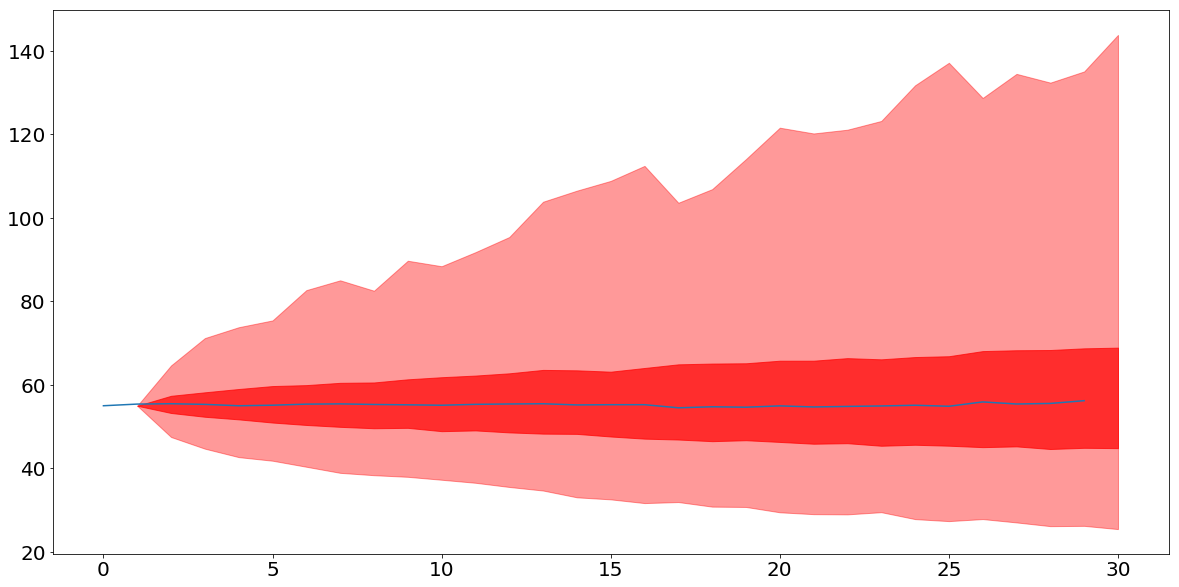

203.005090335 219.159275361 234.994366418


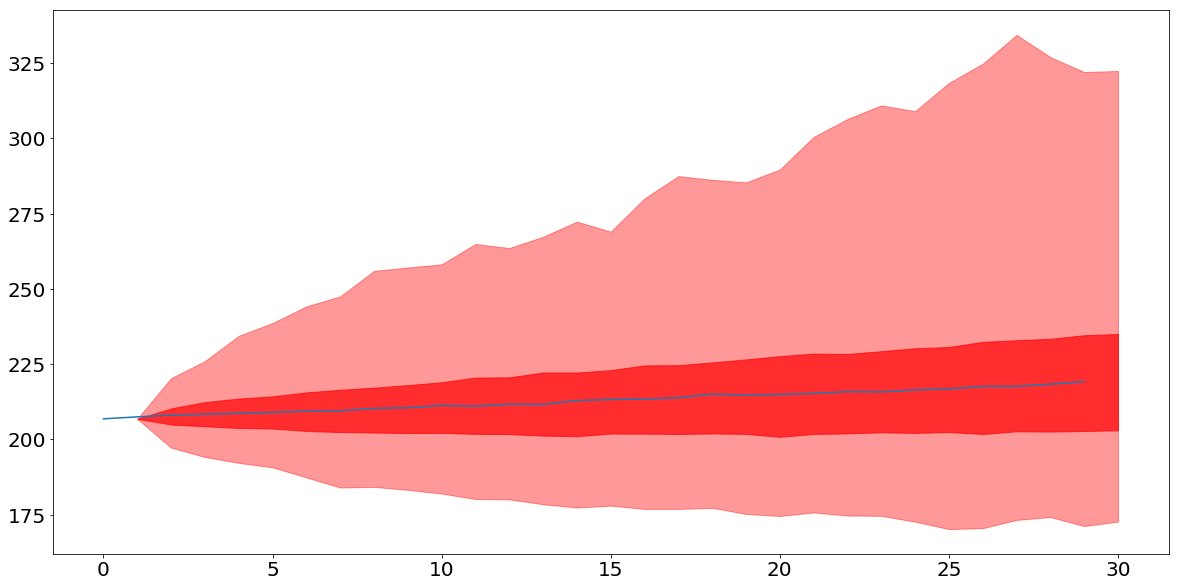

In [24]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
fan_chart(prices['price ltc-usd'], prices['price nvidia'], days=30)

5793.14700054 6667.60410886 7591.96344441


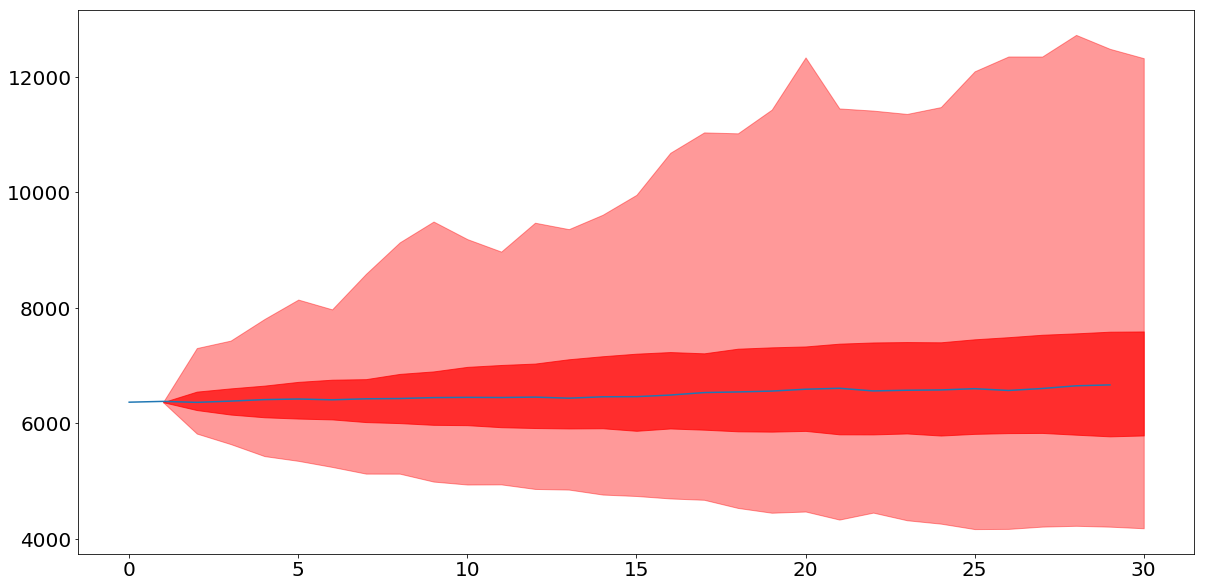

202.885148203 218.239491151 233.69796068


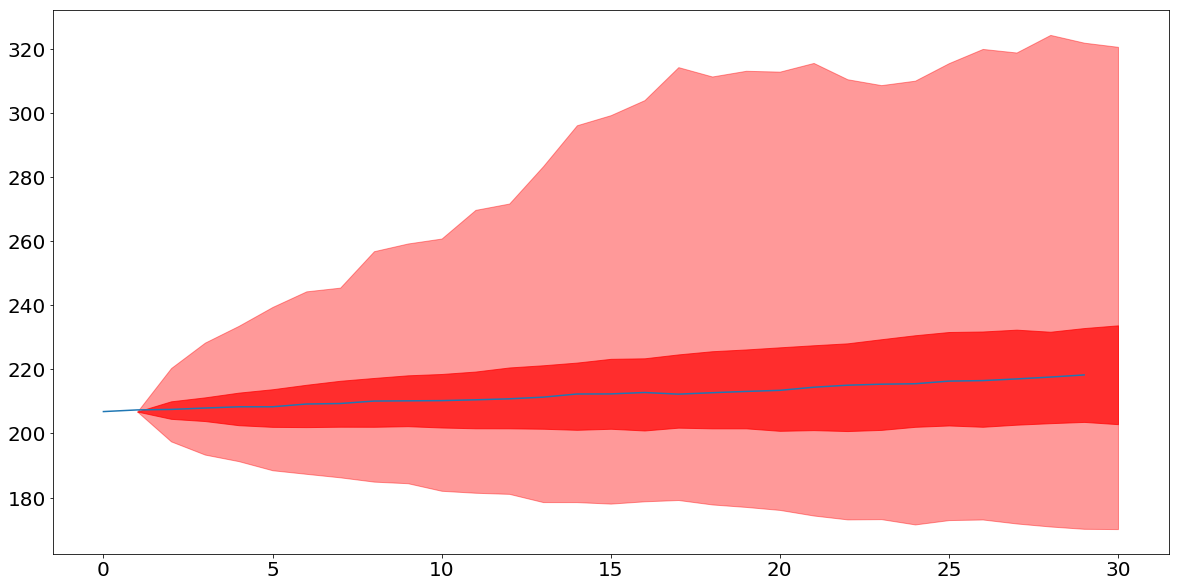

In [25]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
fan_chart(prices['price btc-usd'], prices['price nvidia'], days=30)

0.157705751904 0.20616232328 0.268215792425


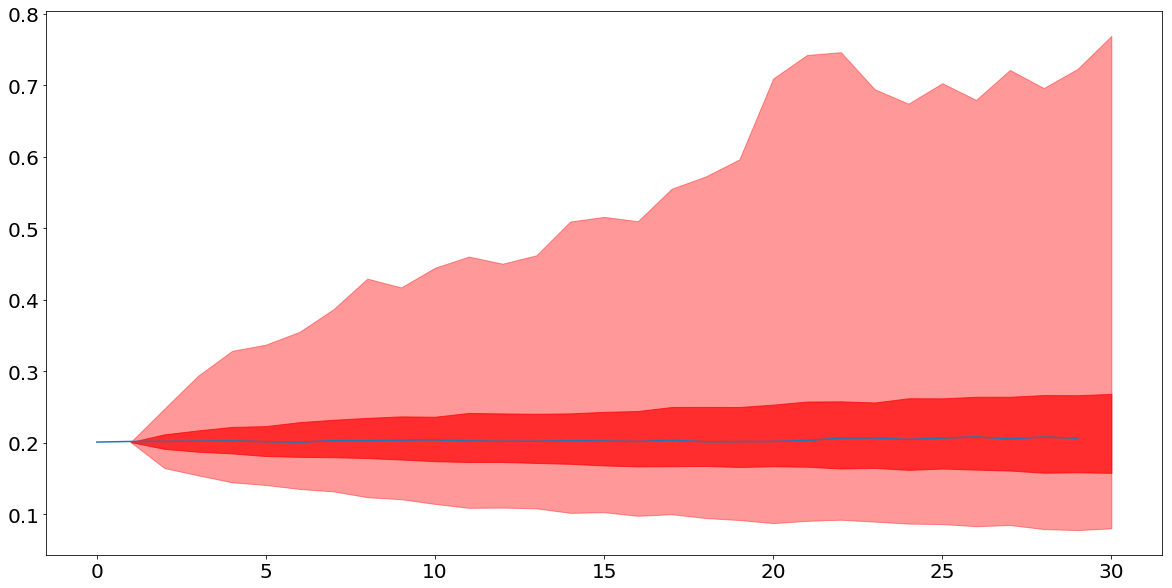

202.742488979 217.626265098 234.40831798


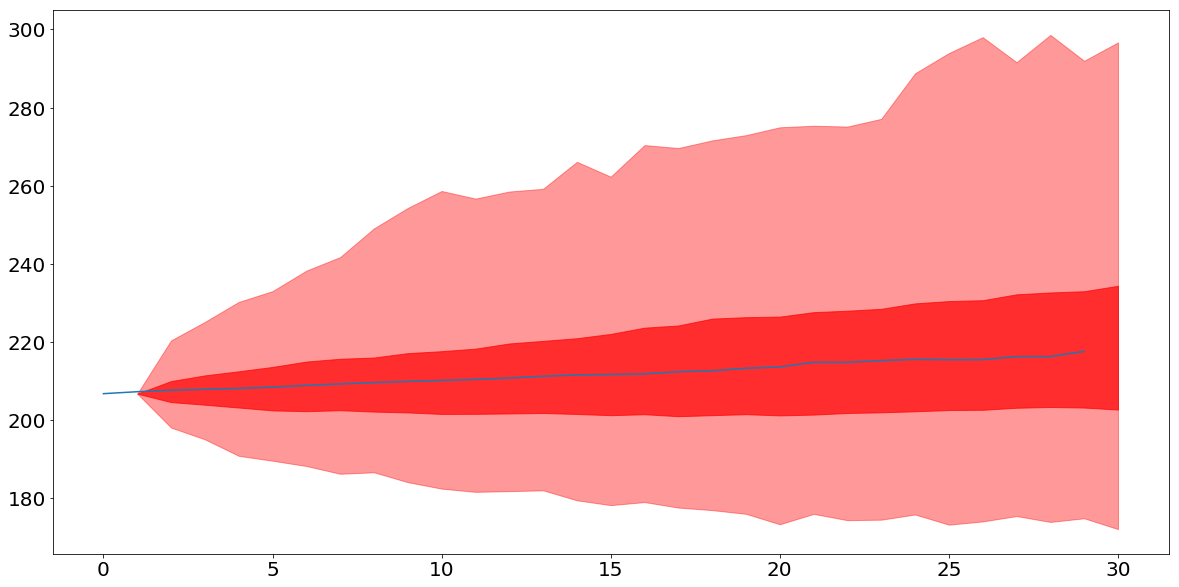

In [26]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
fan_chart(prices['price ripple-usd'], prices['price nvidia'], days=30)

0.157174588589 0.209655925934 0.269058649578


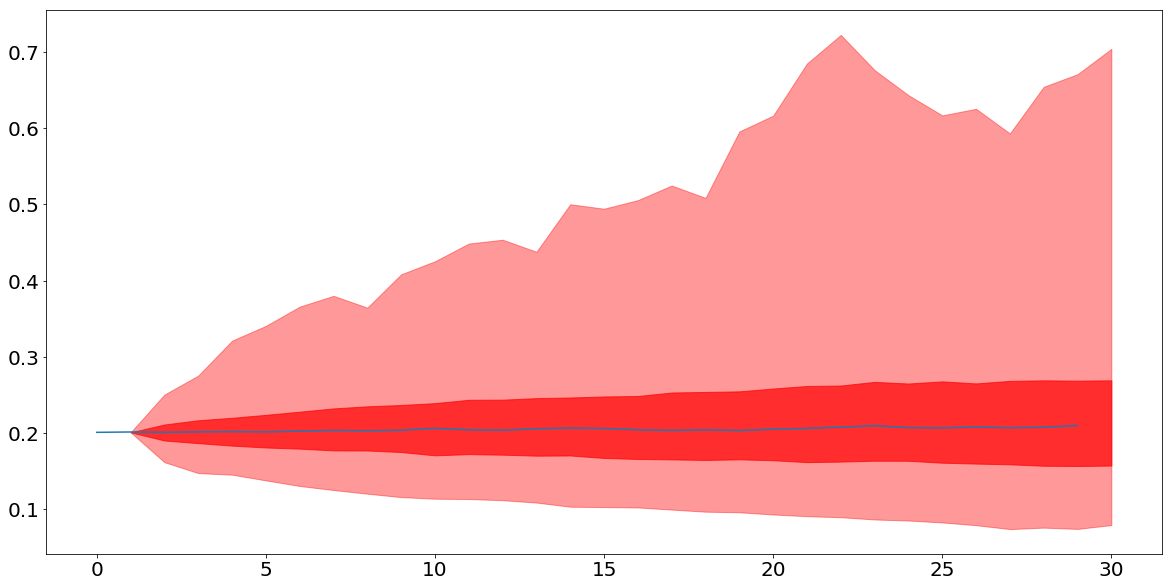

56.5540186577 60.5534958232 64.8586839594


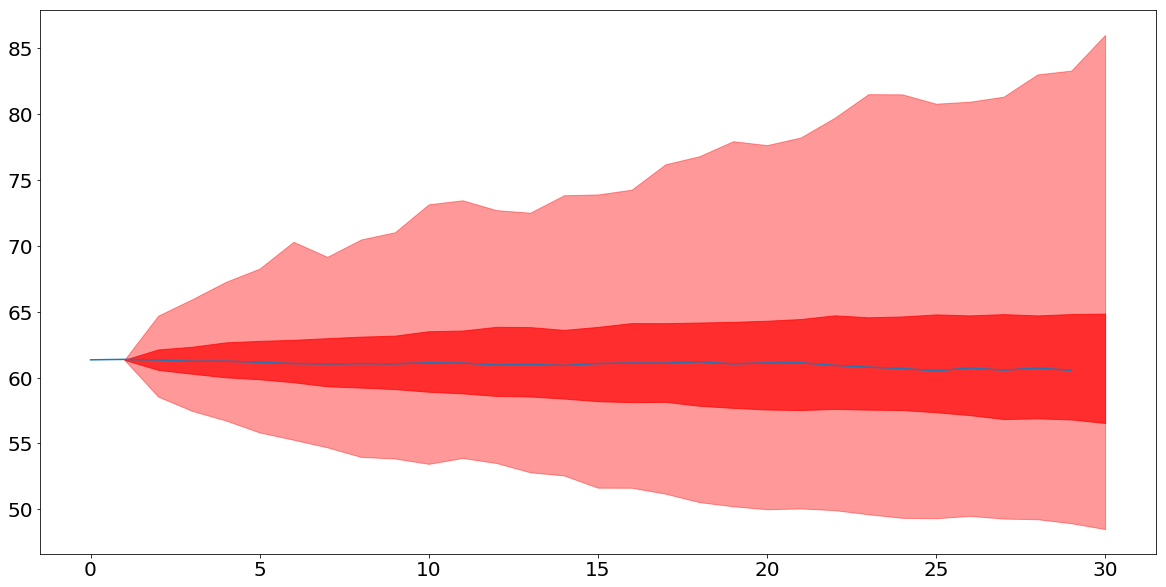

In [27]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.size'] = (20.0)
fan_chart(prices['price ripple-usd'], prices['price crude-oil-prices-europe-usd'], days=30)

In [28]:
def copula_restructure(copula, days):
    matrix1 = [0]*days
    matrix2 = [0]*days
    matrix3 = [0]*days 
    for i in range(0,len(copula[0])):
        matrix1[i] = copula[0][i]
        
    for i in range(0,len(copula[1])):
        matrix2[i] = copula[1][i]
   
    for i in range(0, days):
        matrix3[i] = [matrix1[i], matrix2[i]]
        
    return matrix3

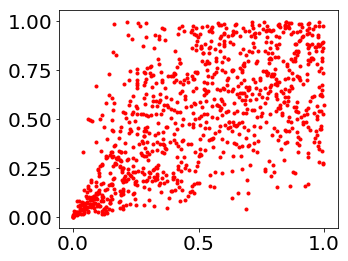

In [36]:
plt.rcParams['figure.figsize'] = (5, 4)
from copulalib.copulalib import Copula
foo=Copula(prices['price btc-usd'], prices['price nvidia'], family='clayton')
uc, vc = foo.generate_uv(1000)
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

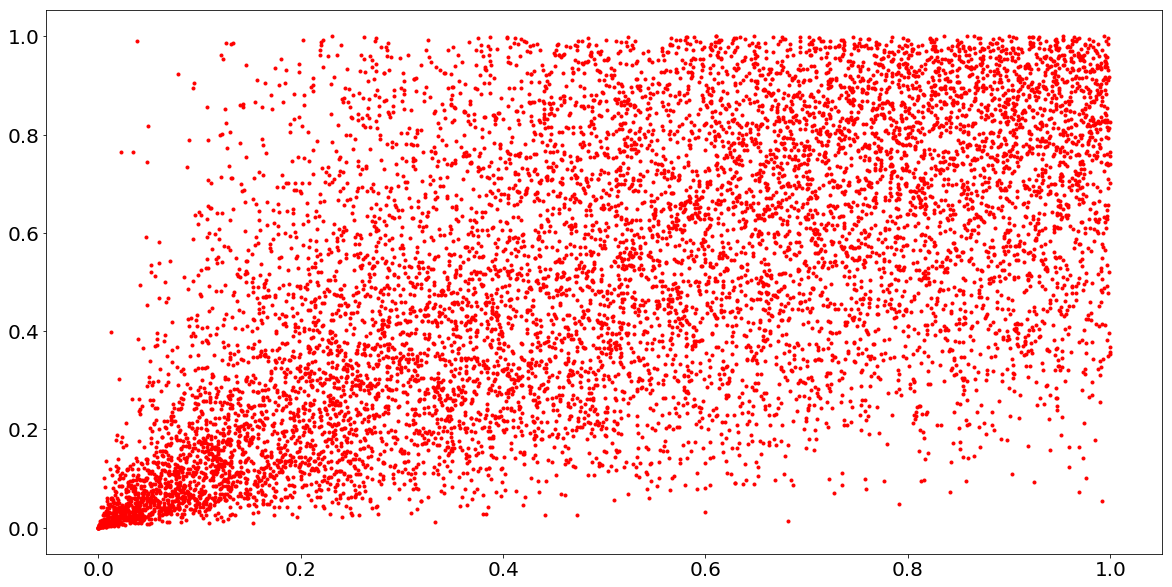

In [38]:
plt.rcParams['figure.figsize'] = (20, 10)
from copulalib.copulalib import Copula
foo=Copula(prices['price btc-usd'], prices['price nvidia'], family='clayton')
uc, vc = foo.generate_uv(10000)
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

In [ ]:
def monte_carlo_multivariate_copula(price1, price2, days):
    #means = [np.mean(price1.pct_change().loc[1:]), np.mean(price2.pct_change().loc[1:])]
    normal_multi=Copula(price1, price2, family='clayton')
    normal_multi=normal_multi.generate_uv(days)
    normal_multi=np.asmatrix(copula_restructure(normal_multi, days))
    for i in range(len(normal_multi)):
        normal_multi[i-1] = normal_multi[i-1]+1
    
    A = []
    A.append([price1.loc[1399], price2.loc[1399]])
    for i in range(1,days): 
        A.append(np.multiply(A[i-1],normal_multi[i-1]))
    return A

In [ ]:
monte_carlo_multivariate_copula(prices['price ltc-usd'], prices['price nvidia'], days=30)

In [ ]:
foo=Copula(prices['price amd-usd'], prices['price btc-usd'], family='clayton')
foo.generate_uv(10)

In [ ]:
#z = zip(prices['price amd-usd'], prices['price btc-usd'])
print(prices['price amd-usd'].pct_change().loc[1:], prices['price ltc-usd'].pct_change().loc[1:])
means = [np.mean(prices['price amd-usd'].pct_change().loc[1:]), np.mean(prices['price ltc-usd'].pct_change().loc[1:])]
cov = np.cov(prices['price amd-usd'].pct_change().loc[1:], prices['price ltc-usd'].pct_change().loc[1:])

In [ ]:
normal_multi = np.random.multivariate_normal(means, cov, 1400)

for i in range(len(normal_multi)):
    normal_multi[i-1] = normal_multi[i-1]+1
    
#normal_multi = normal_multi/normal_multi.sum()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#plt.plot(normal_multi)
print(normal_multi)
print((np.std(normal_multi)**2)/2)

In [30]:

normal_multi.generate_xy()

c:\python36\lib\site-packages\copulalib\copulalib.py:208: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  x2, x1 = KernelDensity(kernel='epanechnikov', bandwidth=0.2).fit(self.X.reshape(-1,1))


TypeError: 'KernelDensity' object is not iterable

In [ ]:
A = [0]*100

A[0] = [prices['price amd-usd'].loc[1399], prices['price btc-usd'].loc[1399]]

for i in range(1,30): 
    A[i] = A[i-1]*normal_multi[i]
    
    
plt.plot(A)
print(A[0][0])
#plt.plot(A)

## Copula

### ??
By introducing a Copula to our model, we try to solve the issue of getting too optimistic results. Applying Monte Carlo Simulations on Copulas should give us more realistic results, as Copulas consider extreme situations with more weight.

In [ ]:
from copulalib.copulalib import Copula
foo=Copula(prices['price amd-usd'], prices['price btc-usd'], family='clayton')

In [ ]:
uc, vc = foo.generate_uv(1000)
#fig = plt.figure()
#fig.add_subplot(4,2,2)
#plt.scatter(uc, vc, marker='.', color='r')
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

In [ ]:
foo=Copula(prices['price amd-usd'], prices['price btc-usd'],family='frank')
uc, vc = foo.generate_uv(1400)

plt.scatter(uc, vc, marker='.', color='r')

In [ ]:
foo=Copula(prices['price amd-usd'], prices['price ltc-usd'],family='gumbel')
uc, vc = foo.generate_uv(1000)
#fig = plt.figure()
#fig.add_subplot(4,2,2)
plt.scatter(uc, vc, marker='.', color='r')
plt.show()

In [ ]:
print(foo.sr)
plt.plot(prices['price amd-usd'][0:299])

In [ ]:
plt.plot(prices['price nvidia'])
plt.plot(prices['price btc-usd']/15)
plt.show()

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as pyplot

In [ ]:
svr_len=SVR(kernel="linear", C=1e3)
svr_poly = SVR(kernel="polynomial", C=1e3, degree=2)
svr_rbf =SVR(kernel="rbf", C=1e3, gamma=0.1)
svr_lim